# Convolutional Neural Networks in practice




In [1]:
# Loading necessary packages

import numpy

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
K.set_image_dim_ordering('th')

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 13s 1us/step


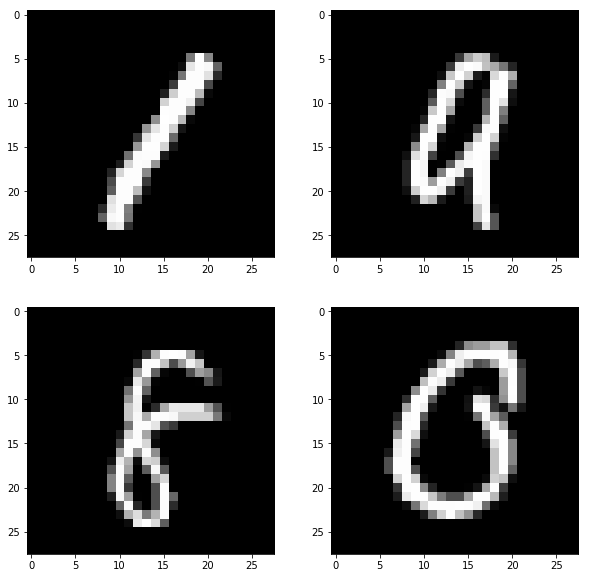

In [4]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.imshow(X_train[23], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[788], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[456], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[234], cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

## Building a FCN for MNIST


In [6]:
# define baseline model
def baseline_model():
    
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [7]:
# build the model
model = baseline_model()

In [8]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 13s - loss: 0.2783 - acc: 0.9210 - val_loss: 0.1413 - val_acc: 0.9577
Epoch 2/10
 - 13s - loss: 0.1114 - acc: 0.9678 - val_loss: 0.0921 - val_acc: 0.9701
Epoch 3/10
 - 14s - loss: 0.0719 - acc: 0.9797 - val_loss: 0.0784 - val_acc: 0.9775
Epoch 4/10
 - 13s - loss: 0.0505 - acc: 0.9855 - val_loss: 0.0751 - val_acc: 0.9766
Epoch 5/10
 - 14s - loss: 0.0375 - acc: 0.9892 - val_loss: 0.0680 - val_acc: 0.9794
Epoch 6/10
 - 17s - loss: 0.0269 - acc: 0.9926 - val_loss: 0.0639 - val_acc: 0.9800
Epoch 7/10
 - 16s - loss: 0.0211 - acc: 0.9945 - val_loss: 0.0626 - val_acc: 0.9799
Epoch 8/10
 - 17s - loss: 0.0141 - acc: 0.9970 - val_loss: 0.0625 - val_acc: 0.9796
Epoch 9/10
 - 20s - loss: 0.0110 - acc: 0.9978 - val_loss: 0.0596 - val_acc: 0.9808
Epoch 10/10
 - 24s - loss: 0.0081 - acc: 0.9985 - val_loss: 0.0586 - val_acc: 0.9821


In [9]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Accuracy: {:.2f}%".format(scores[1]*100))
print("Baseline Error: {:.2f}%".format(100-scores[1]*100))

Baseline Accuracy: 98.21%
Baseline Error: 1.79%


## Building a shallow CNN for MNIST


In [10]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [11]:
# define a simple CNN model
def cnn_model():
    
    # create model
    model = Sequential()
    model.add(Convolution2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
# build the model
cnn_model = cnn_model()

In [ ]:
# Fit the model
cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 439s - loss: 0.2454 - acc: 0.9298 - val_loss: 0.0730 - val_acc: 0.9782
Epoch 2/10
 - 531s - loss: 0.0733 - acc: 0.9782 - val_loss: 0.0484 - val_acc: 0.9854
Epoch 3/10
 - 333s - loss: 0.0524 - acc: 0.9844 - val_loss: 0.0395 - val_acc: 0.9871
Epoch 4/10
 - 303s - loss: 0.0399 - acc: 0.9878 - val_loss: 0.0392 - val_acc: 0.9876
Epoch 5/10
 - 258s - loss: 0.0336 - acc: 0.9894 - val_loss: 0.0438 - val_acc: 0.9865
Epoch 6/10
 - 246s - loss: 0.0278 - acc: 0.9913 - val_loss: 0.0347 - val_acc: 0.9885
Epoch 7/10
 - 188s - loss: 0.0231 - acc: 0.9922 - val_loss: 0.0348 - val_acc: 0.9885
Epoch 8/10


In [ ]:
# Final evaluation of the model
cnn_scores = cnn_model.evaluate(X_test, y_test, verbose=0)
print("CNN Accuracy: {:.2f}%".format(cnn_scores[1]*100))
print("CNN Error: {:.2f}%".format(100-cnn_scores[1]*100))

## Building a deeper CNN for MNIST


In [ ]:
# define the larger model
def larger_cnn_model():
    
    # create model
    model = Sequential()
    model.add(Convolution2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Convolution2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
# build the model
large_cnn_model = larger_cnn_model()

In [ ]:
# Fit the model
large_cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

In [ ]:
# Final evaluation of the model
large_cnn_scores = large_cnn_model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Accuracy: {:.2f}%".format(large_cnn_scores[1]*100))
print("Large CNN Error: {:.2f}%".format(100-large_cnn_scores[1]*100))